##### Liam Byrne
##### DATA 620 - Web Analytics
##### Fall - 2017

# Week 8

***

## High Frequency Words
The Wall Street Journal corpus from nltk is used in this assignment to analyze work frequencies. The corpus is under ```text7``` of the ```nltk.book``` collection. After loading this corpus, we will go through some processes to understand frequency properties of this corpus.

In [1]:
from nltk.book import text7

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


***
**How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).**

We will first clean the text in order to answer this question. Namely:

+ Make all words lowercase
+ stem words
+ drop punctuation and numerics

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import re

print("There are {0} unique words before cleaning the text.".format(len(set(text7))))

#Instantiate Stemmer
stm = PorterStemmer()
# Stem words
txt_clean = [stm.stem(t.lower()) for t in text7]

# Remove non-alphas and keep whitespace. Drop empty strings
txt_clean = [re.sub('[^a-zA-Z\s]',"", t) for t in txt_clean]
txt_clean = list(filter(None, txt_clean))

print("\nThere are {0} unique words after cleaning the text.".format(len(set(txt_clean))))

There are 12408 unique words before cleaning the text.

There are 7055 unique words after cleaning the text.


***
**Taking the most common words, how many unique words represent half of the total words in the corpus?**

In order to accomplish this, we first need to know the frequency of each unique word. We will step through a sorted frequency list until we reach $50%$ representation. 

In [3]:
from nltk import FreqDist
import operator

freq = FreqDist(txt_clean)
freq = sorted(freq.items(), key = operator.itemgetter(1),
              reverse = True)

sum_words = 0
counter  = 0

# j is frequency count for each key word
for i,j in freq:
    counter = counter + 1
    sum_words = sum_words + j
    if sum_words/len(txt_clean) >= 0.5:
        break
        
print("{0} unique words represent half of the total words in the corpus.".format(
counter))

118 unique words represent half of the total words in the corpus.


***
**Identify the 200 highest frequency words in this corpus.**

This straightforward task will convert the frequency list into a DataFrame.

In [4]:
import pandas as pd
from IPython.display import display

freq_200 = FreqDist(txt_clean).most_common(200)

freq_df = pd.DataFrame({"word": [i for i,j in freq_200],
                       "frequency": [j for i,j in freq_200]})
freq_df = freq_df[["word", "frequency"]]
display(freq_df)

,word,frequency
0,the,4764
1,of,2325
2,to,2182
3,a,2006
4,in,1770
5,t,1619
6,and,1556
7,it,920
8,s,869
9,for,853


***
**Create a graph that shows the relative frequency of these 200 words.**

We need to plot the graphs with a word limit of 25 to make it readable. However, ```Nltk``` is not very useful with slicing probability sets. We need to build the frequency distribution and then exclude previously plotted words. We also need to convert the native frequency output of ```FreqDict``` to a relative number rather than a count in the process. We will plot the whole 200 at first to get a general sense of the shape of the distribution.

Top 200 frequency plot


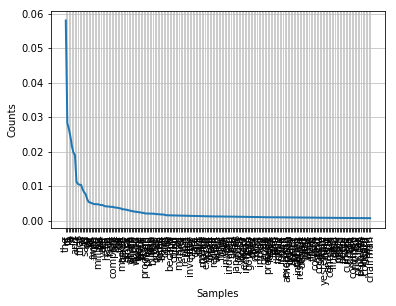

Plot Ranks 1 - 25


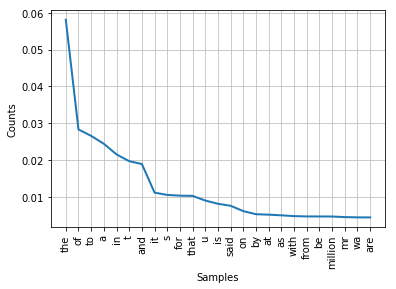

Plot Ranks 26 - 50


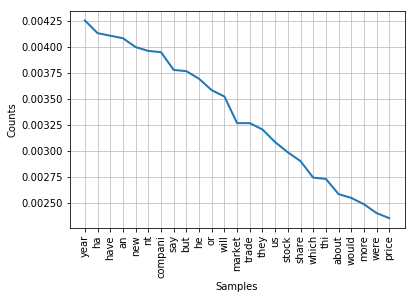

Plot Ranks 51 - 75


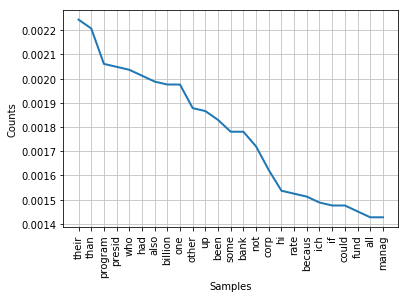

Plot Ranks 76 - 100


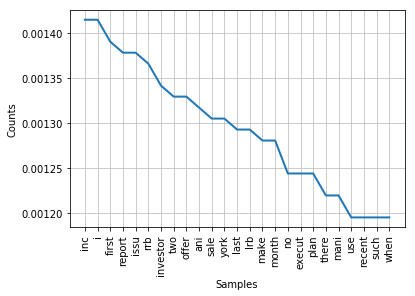

Plot Ranks 101 - 125


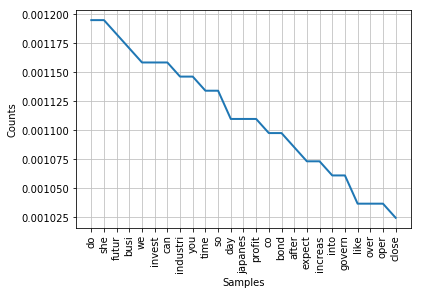

Plot Ranks 126 - 150


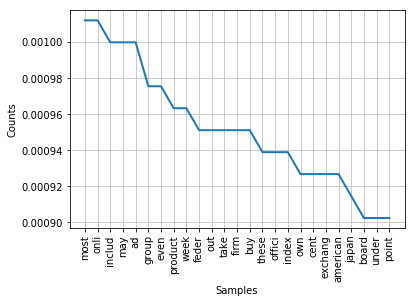

Plot Ranks 151 - 175


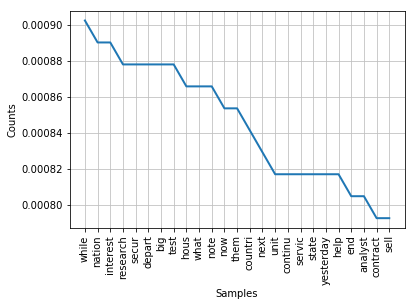

Plot Ranks 176 - 200


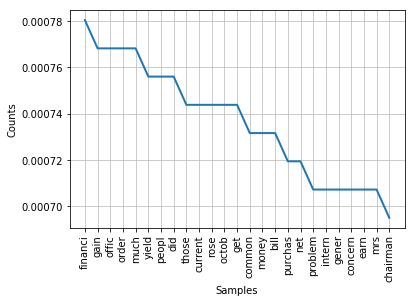

In [5]:
print("Top 200 frequency plot")
fd_tmp = FreqDist(txt_clean)
for k in fd_tmp.keys():
        fd_tmp[k] = float(fd_tmp[k])/len(txt_clean)
fd_tmp.plot(200)

for i in range(0, 8):
    # exclude previously plotted top frequencies
    exclude = set([j for j,k in FreqDist(txt_clean).most_common(25*i)])
    fd_tmp = FreqDist(txt_clean)
    # pop exclusions... list comp with "if in" is too slow
    for e in exclude:
        fd_tmp.pop(e)
    # Convert counts to relative frequencies    
    for k in fd_tmp.keys():
        fd_tmp[k] = float(fd_tmp[k])/len(txt_clean)
    # Plot next 25 top frequencies
    print("Plot Ranks {0} - {1}".format(i*25+1, (i+1)*25))
    fd_tmp.plot(25)

***
**Does the observed relative frequency of these words follow Zipf’s law? Explain.**

Zipf's Law observes a phenomena in language where the frequency of a word is proportional to the inverse of its rank in a collection, i.e. it's logarithmic. Knowing the frequency of the top ranked word and the rank of any given word in that collection, the equation $$Frequency_{Rank_1}(\frac{1}{Rank_{n}})$$ should give a very close approximation to the frequency of of this $n^{th}$ word.

At first glance form the top 200 plot, the frequencies do appear to hold to Zipf's Law; the relative frequencies appear  proportional to the inverse of the ranks. On a log-log scale plot of frequency~rank, a collection of text following Zipf's Law should be linear. We will check this below.

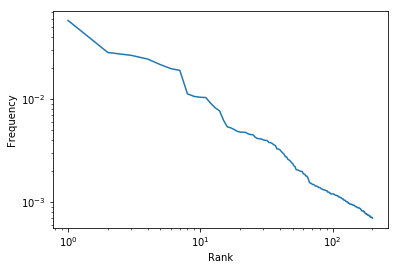

In [6]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(freq_df.index+1, freq_df.frequency/len(txt_clean))
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Frequency")
plt.xlabel("Rank")

plt.show()

The plot shows a very strong relationship to a linear trend, which is not surprising. Zipf's law has been shown, for texts of an adequate size, to follow this trend very closely. 

***
**In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**

The top ten most frequent words in the *Oxford English Corpus (OEC)*, a text corpus of the 21st century English that contains nearly 2.1 billion words, are:

+ the
+ be
+ to
+ of
+ and
+ a
+ in
+ that
+ have
+ I

Our top 10 are:

In [8]:
display(freq_df[:10])

,word,frequency
0,the,4764
1,of,2325
2,to,2182
3,a,2006
4,in,1770
5,t,1619
6,and,1556
7,it,920
8,s,869
9,for,853


Our *Wall Street Journal Corpus* has a about half these words in the the top 10. The stemmer used to remove such things as conjunctions and morphological affixes may be the cause for the single characters *t* and *s* being in the top 10.

Imagining that the ranks of words for this "Global Corpus" would be similar to the OEC, our corpus should be relatively close, but not very strong, in terms of relative frequencies due to the *Wall Street Journal* having a specific subject matter that is not greatly proportional to all English texts' subject matters. The phenomenon of Zipf's Law, however, would have an even stronger trend as that outlined previously for the "Global Corpus", since it has been shown to be eerily close in predicting frequencies in the OEC.